In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

In [3]:
x, y = make_regression(n_samples= 100, n_features= 1, noise=10)
#y = y + abs(y/2) #Pour une regression polynomiale 

In [ ]:
plt.scatter(x, y)

In [5]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [11]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
#X = np.hstack((x**2, X)) #Pour une regression polynomiale de degre 2
X.shape

(100, 2)

In [13]:
teta = np.random.randn(2, 1) 
# teta = np.random.randn(2, 1) #Pour une regression polynomiale de degre 2
teta

array([[ 0.21946829],
       [-0.67130549]])

# 2. Model

In [14]:
def model(X, teta):
    return X.dot(teta)

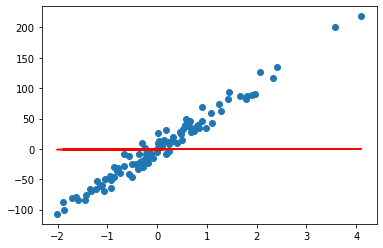

In [17]:
plt.scatter(x, y)
plt.plot(x, model(X, teta), c='r')

# 3. La fonction Cout

In [21]:
def fonct_cout(X, y, teta):
    m = len(y)
    return 1/(2*m)* np.sum((model(X, teta) - y)**2)

In [22]:
fonct_cout(X, y, teta)

1798.0367080010108

# 4. Descente de Gradient

In [26]:
def grad(X, y, teta):
    m = len(y)
    return 1/m * X.T.dot(model(X, teta) - y)

In [39]:
def gradient_descent(X, y, teta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        teta = teta - learning_rate * grad(X, y, teta)
        cost_history[i] = fonct_cout(X, y, teta)
    return teta, cost_history
    

# 5. Entrainement de model

In [40]:
teta_final, cost_history = gradient_descent(X, y, teta, learning_rate=0.01, n_iterations=1000)
teta_final

array([[52.23956588],
       [ 0.53481366]])

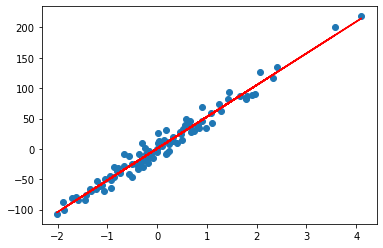

In [32]:
prediction = model(X, teta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c='r')

# 6. Courbe d'apprentissage

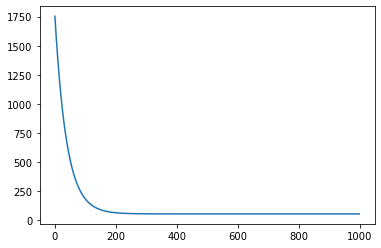

In [41]:
plt.plot(range(1000), cost_history)

# 7. Coefficient de détermination
**Pour évaluer la performance d'un modél de régression, on peut utiliser le coefficient de détermination**

In [44]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [45]:
coef_determination(y, prediction)

0.9689384237278689